In [1]:
from draw_tree import draw_tree, generate_tex, generate_pdf, generate_png

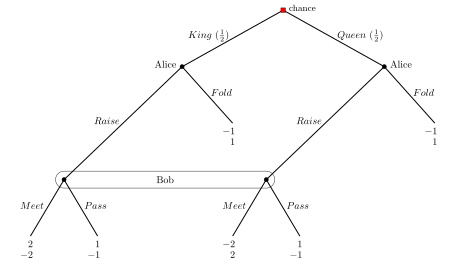

In [2]:
draw_tree("../games/one_card_poker.ef")

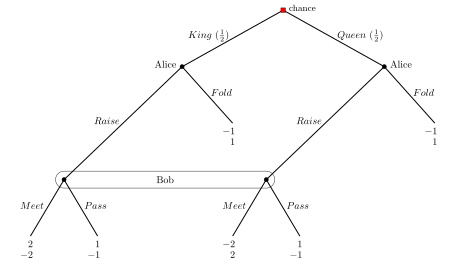

In [3]:
draw_tree("../games/efg/one_card_poker.efg")

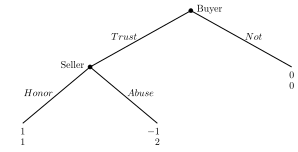

In [4]:
draw_tree("../games/efg/trust_game.efg")

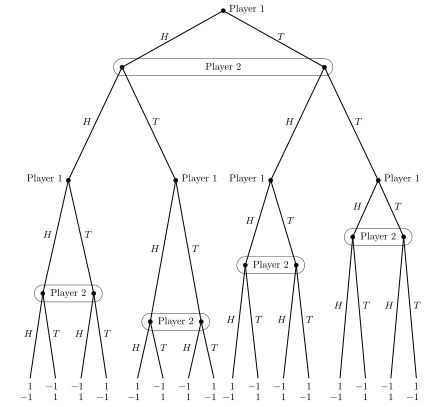

In [5]:
draw_tree("../games/2smp.ef")

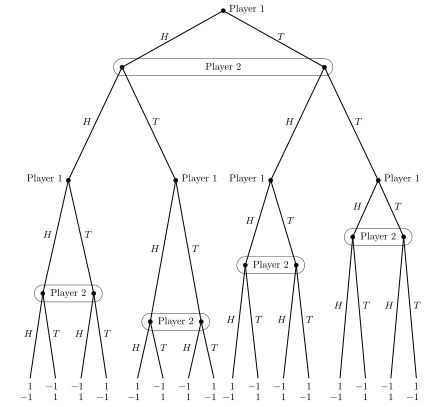

In [6]:
draw_tree("../games/efg/2smp.efg")

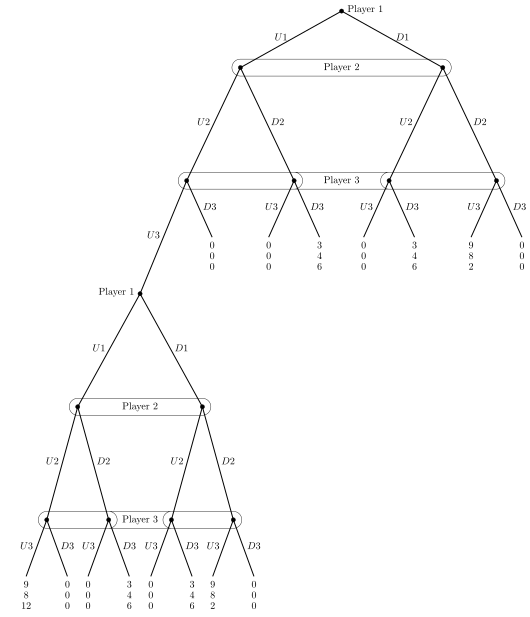

In [7]:
draw_tree("../games/2s2x2x2.ef")

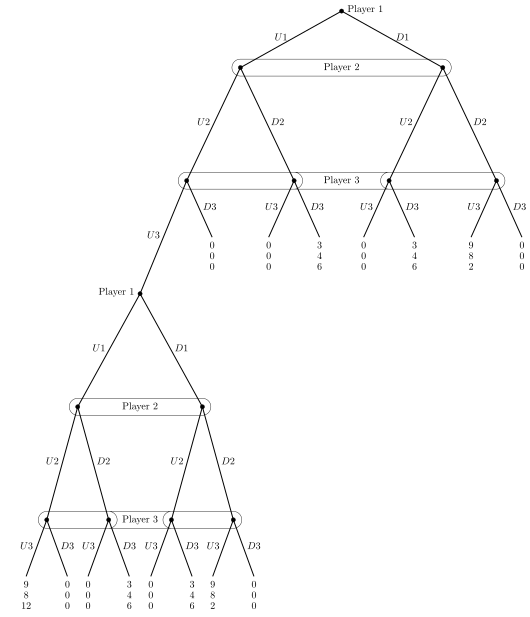

In [8]:
draw_tree("../games/efg/2s2x2x2.efg")

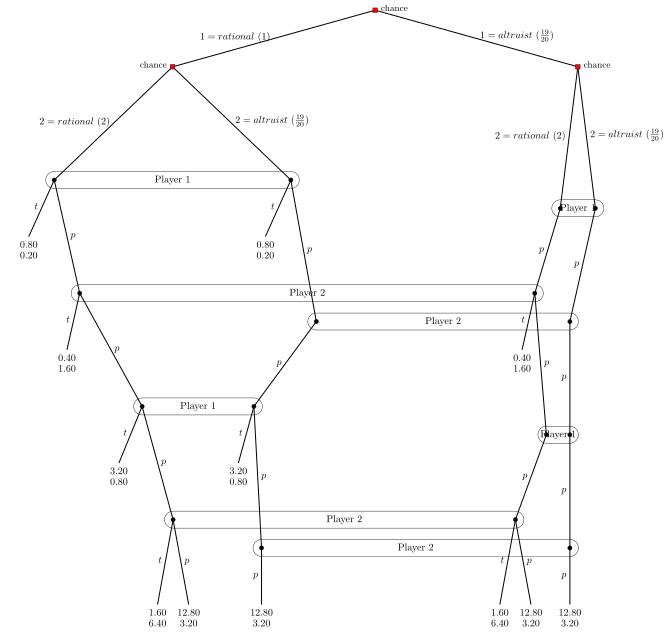

In [9]:
draw_tree("../games/cent2.ef")

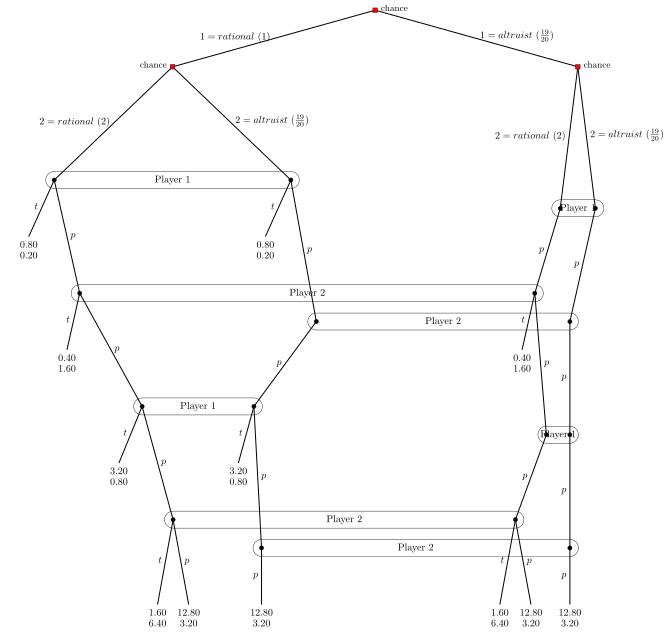

In [10]:
draw_tree("../games/efg/cent2.efg")

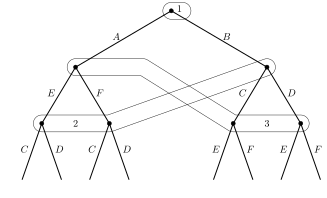

In [11]:
draw_tree("../games/crossing.ef")

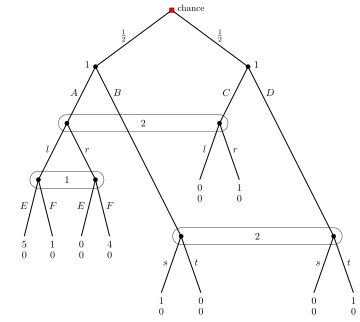

In [12]:
draw_tree("../games/Figure1.ef")

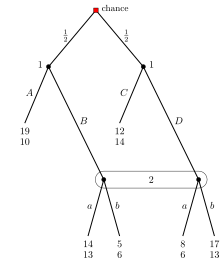

In [13]:
draw_tree("../games/MyTree1.ef")

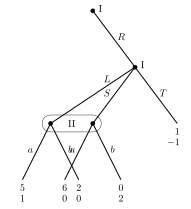

In [14]:
draw_tree("../games/oldex.ef")

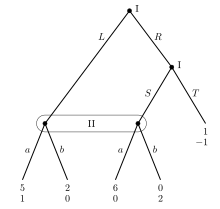

In [15]:
draw_tree("../games/x1.ef")

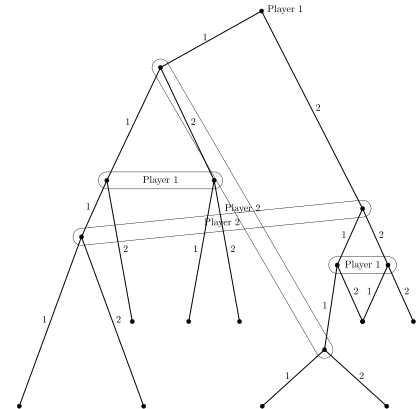

In [16]:
draw_tree("../games/efg/cross.efg")

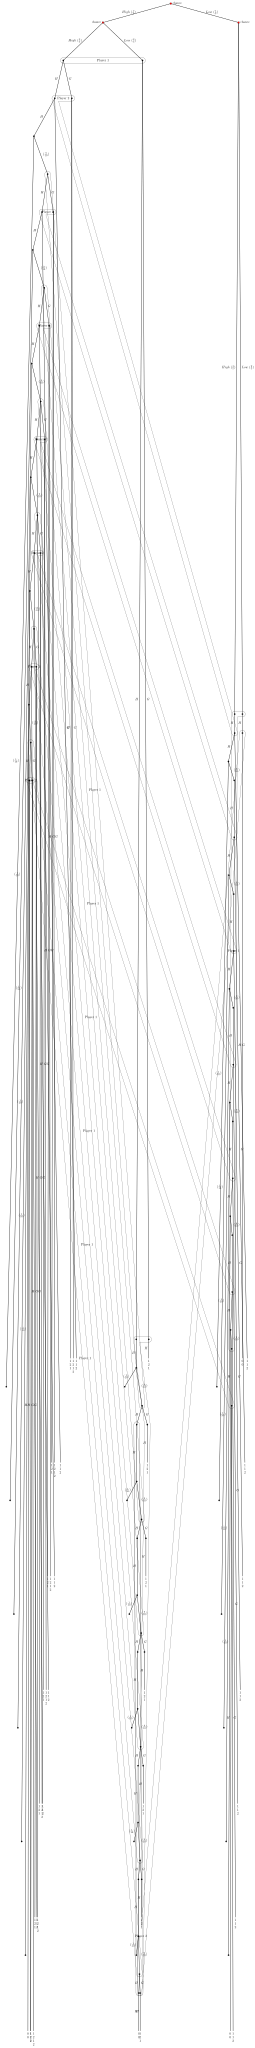

In [17]:
draw_tree("../games/efg/holdout.efg")

In [18]:
generate_tex('../games/x1.ef')
generate_pdf('../games/x1.ef')
generate_png('../games/x1.ef')

'/Users/echalstrey/projects/draw_tree/tutorial/x1.png'

In [19]:
generate_tex('../games/efg/one_card_poker.efg')
generate_pdf('../games/efg/one_card_poker.efg')
generate_png('../games/efg/one_card_poker.efg')

'/Users/echalstrey/projects/draw_tree/tutorial/one_card_poker.png'